# Parts of Speech
Parts of Speech will play a big role in how several questions I'm exploring--like adjective counts and command counts. In the code below, I tag every line with parts of speech and add an adjectives column.
Do female speakers really tend to use more adjectives/adverbs (flowery language)? How many commands do they use.

For this analysis, I use the [PennTreebank POS Tagger](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). It marks both verb base forms (for commands) and modals (for forms like "must, could, should").

In [1]:
import pandas as pd
import nltk

In [2]:
from matplotlib import pyplot as plt

In [3]:
%pprint

Pretty printing has been turned OFF


In [4]:
movie_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_dialogue_toktypes.pkl")

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442 entries, 0 to 13441
Data columns (total 14 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
dtypes: int64(4), object(10)
memory usage: 945.2+ KB


In [6]:
movie_df['POS'] = movie_df["Tokens"].map(nltk.pos_tag)

In [7]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{farthest, wind, thee, !, mirror, thy, darknes...",26,24,"[(slave, NN), (in, IN), (the, DT), (magic, JJ)..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{my, queen, thou, what, ,, know, ?, wouldst}",8,8,"[(what, WP), (wouldst, VBZ), (thou, NN), (know..."
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{wall, mirror, of, the, fairest, one, is, ,, ?...",14,13,"[(magic, JJ), (mirror, NN), (on, IN), (the, DT..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{rags, thee, gentle, famed, thy, i, not, ., a,...",33,27,"[(famed, VBN), (is, VBZ), (thy, JJ), (beauty, ..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{!, alas, name, for, her, ., reveal}",8,7,"[(alas, NN), (for, IN), (her, PRP$), (!, .), (..."


In [8]:
movie_df['Tag_Freq'] = movie_df['POS'].map(lambda x: nltk.FreqDist(tag for (word, tag) in x))

In [9]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS,Tag_Freq
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{farthest, wind, thee, !, mirror, thy, darknes...",26,24,"[(slave, NN), (in, IN), (the, DT), (magic, JJ)...","{'NN': 9, 'IN': 3, 'DT': 2, 'JJ': 2, 'VBN': 1,..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{my, queen, thou, what, ,, know, ?, wouldst}",8,8,"[(what, WP), (wouldst, VBZ), (thou, NN), (know...","{'WP': 1, 'VBZ': 1, 'NN': 3, ',': 1, 'PRP$': 1..."
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{wall, mirror, of, the, fairest, one, is, ,, ?...",14,13,"[(magic, JJ), (mirror, NN), (on, IN), (the, DT...","{'JJ': 1, 'NN': 2, 'IN': 2, 'DT': 3, ',': 1, '..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{rags, thee, gentle, famed, thy, i, not, ., a,...",33,27,"[(famed, VBN), (is, VBZ), (thy, JJ), (beauty, ...","{'VBN': 1, 'VBZ': 2, 'JJ': 3, 'NN': 7, ',': 3,..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{!, alas, name, for, her, ., reveal}",8,7,"[(alas, NN), (for, IN), (her, PRP$), (!, .), (...","{'NN': 3, 'IN': 1, 'PRP$': 2, '.': 2}"


In [10]:
movie_df['POS'].iloc[0] #not all that accurate

[('slave', 'NN'), ('in', 'IN'), ('the', 'DT'), ('magic', 'JJ'), ('mirror', 'NN'), ('come', 'VBN'), ('from', 'IN'), ('the', 'DT'), ('farthest', 'JJS'), ('space', 'NN'), ('through', 'IN'), ('wind', 'NN'), ('and', 'CC'), ('darkness', 'NN'), ('i', 'NN'), ('summon', 'VBP'), ('thee', 'NN'), ('.', '.'), ('speak', 'NN'), ('!', '.'), ('let', 'VB'), ('me', 'PRP'), ('see', 'VB'), ('thy', 'JJ'), ('face', 'NN'), ('.', '.')]

In [11]:
movie_df['Adj_Count'] = movie_df['Tag_Freq'].map(lambda x: x['JJ']+x['JJR']+x['JJS'])

In [12]:
movie_df['Adv_Count'] = movie_df['Tag_Freq'].map(lambda x: x['RB']+x['RBR']+x['RBS'])

In [13]:
adj_by_gen = movie_df.groupby('Gender')['Adj_Count'].describe()['mean']

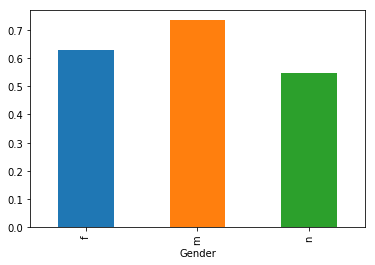

In [14]:
adj_by_gen.plot.bar()

In [15]:
adv_by_gen = movie_df.groupby('Gender')['Adv_Count'].describe()['mean']

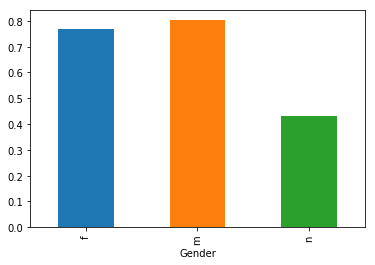

In [16]:
adv_by_gen.plot.bar()

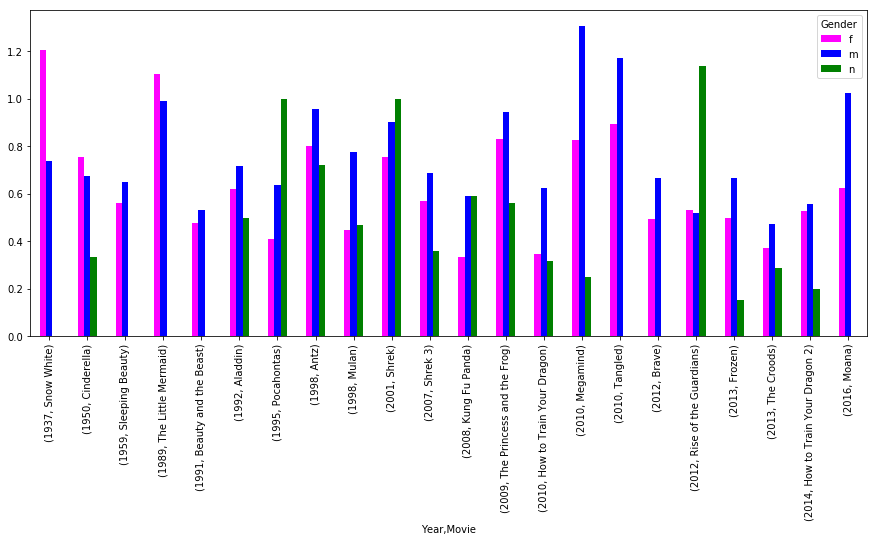

In [17]:
#let's take a look by movie....
adj_by_gen_all = movie_df.groupby(['Year','Movie','Gender'])["Adj_Count"].describe()['mean']
adj_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

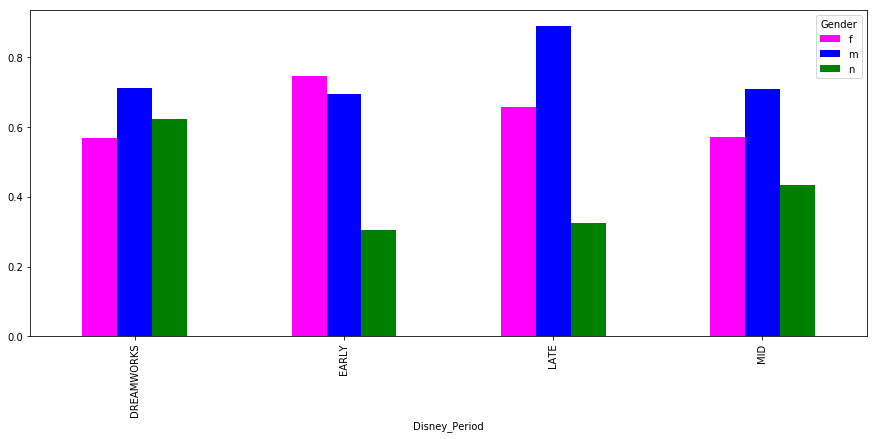

In [18]:
adj_by_gen_all = movie_df.groupby(['Disney_Period','Gender'])["Adj_Count"].describe()['mean']
adj_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

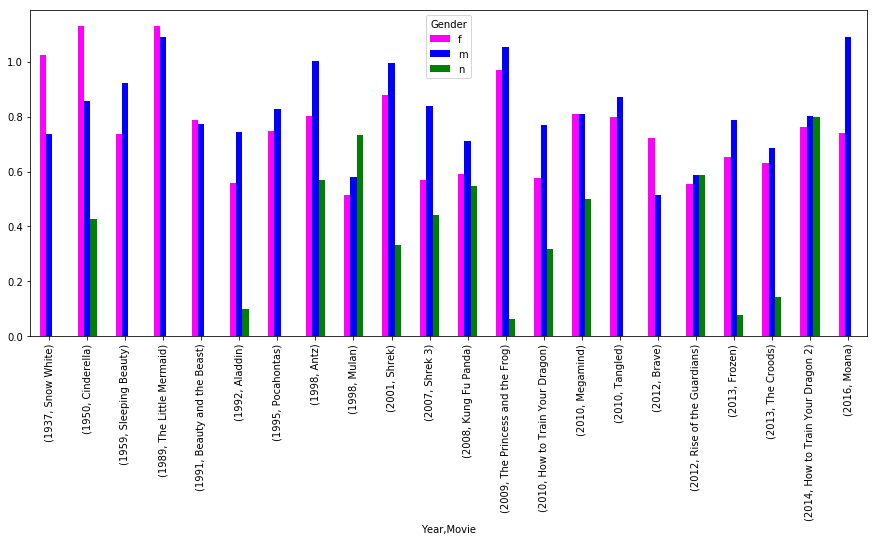

In [19]:
adv_by_gen_all = movie_df.groupby(['Year','Movie','Gender'])["Adv_Count"].describe()['mean']
adv_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

I really feel like these results are being skewed by the number of lines a character has.... or how long they are...

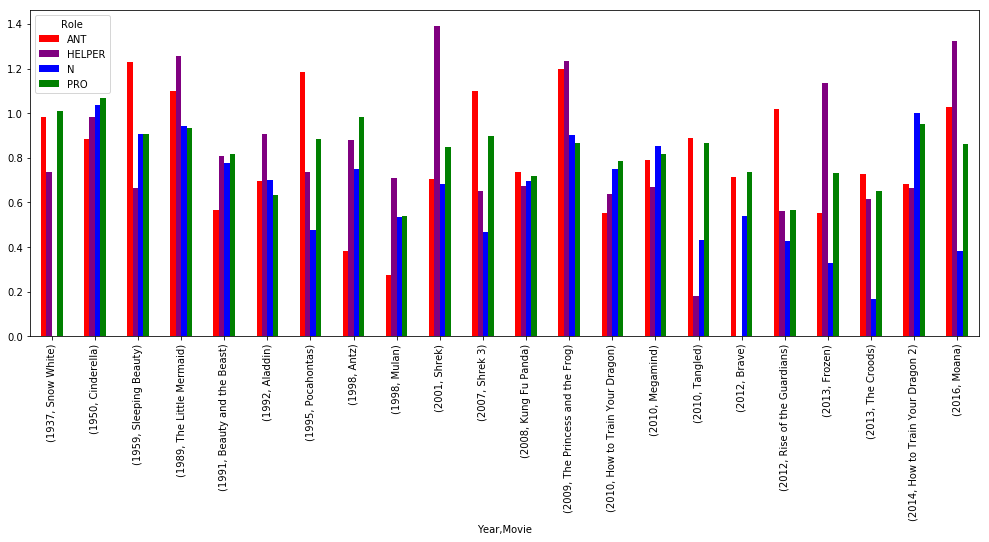

In [20]:
adv_by_role_all = movie_df.groupby(['Year','Movie','Role'])["Adv_Count"].describe()['mean']
adv_by_role_all.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (17,6))
#very hard to read...

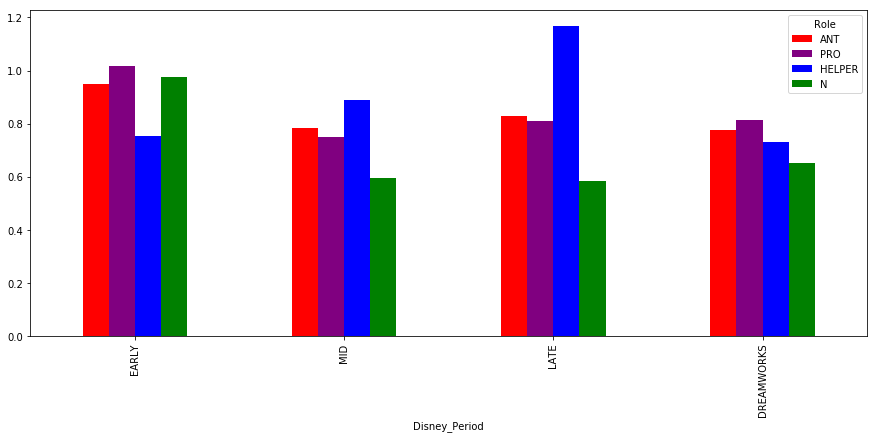

In [21]:
adv_by_role = movie_df.groupby(['Disney_Period','Role'], sort=False)["Adv_Count"].describe()['mean']
adv_by_role.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (15,6))

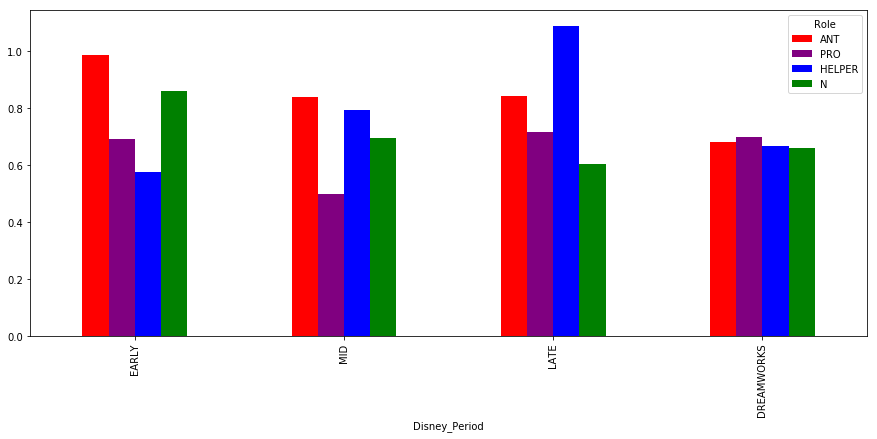

In [22]:
adj_by_role = movie_df.groupby(['Disney_Period','Role'], sort=False)["Adj_Count"].describe()['mean']
adj_by_role.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (15,6))

In [23]:
#only looking at male of female
movie_gen_df = movie_df[movie_df.Gender != 'n']

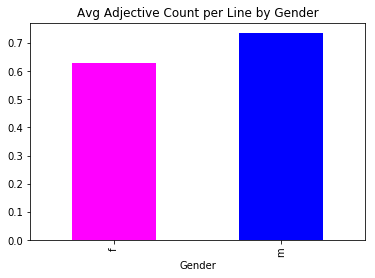

In [24]:
adj_by_gen = movie_gen_df.groupby('Gender')['Adj_Count'].describe()['mean']
adj_by_gen.plot.bar(color = ['magenta', 'blue'])
plt.title('Avg Adjective Count per Line by Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\adj_gen.png")

In [25]:
#looking only at marked roles
movie_role_df = movie_df[movie_df.Role != 'N']

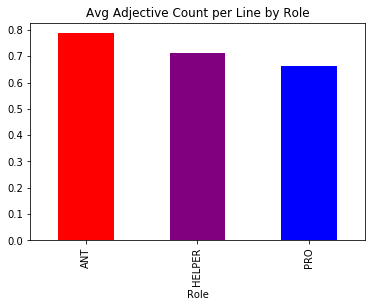

In [26]:
adj_by_role = movie_role_df.groupby('Role')['Adj_Count'].describe()['mean']
adj_by_role.plot.bar(color = ['red','purple', 'blue'])
plt.title('Avg Adjective Count per Line by Role')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\adj_role.png")

In [27]:
movie_gen_role_df = movie_df[(movie_df.Gender != 'n') & (movie_df.Role != 'N')]

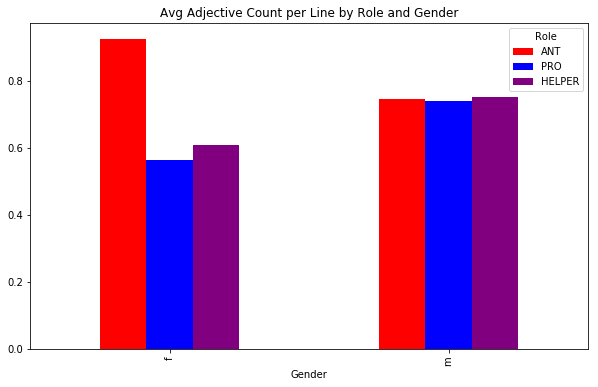

In [28]:
adj_by_role = movie_gen_role_df.groupby(['Gender','Role'], sort=False)["Adj_Count"].describe()['mean']
adj_by_role.unstack().plot.bar(color = ['red','blue', 'purple'], figsize = (10,6))
plt.title('Avg Adjective Count per Line by Role and Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\adj_role_gen.png")

## Refining Adjective Counts
These are just overall adjective counts per line. But we already saw that in general men tend to have longer lines. It's reasonable to assume that a longer line may have more adjectives. To keep line length from influencing our data, let's create a new column, which looks at adjective count normalized over token count per line.

In [29]:
movie_df['Adj_over_Tokens'] = movie_df.Adj_Count / movie_df.Token_Count

In [30]:
movie_df.Adj_over_Tokens.describe() #some REALLY small numbers here

count    13442.000000
mean         0.048808
std          0.079000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.083333
max          1.000000
Name: Adj_over_Tokens, dtype: float64

In [31]:
#only looking at male of female
movie_gen_df = movie_df[movie_df.Gender != 'n']
movie_role_df = movie_df[movie_df.Role != 'N']
movie_gen_role_df = movie_df[(movie_df.Gender != 'n') & (movie_df.Role != 'N')]

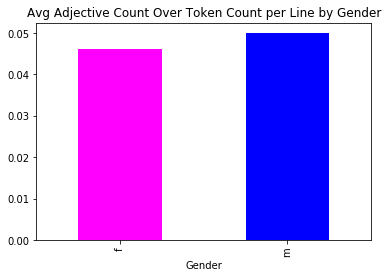

In [32]:
adj_by_gen = movie_gen_df.groupby('Gender')['Adj_over_Tokens'].describe()['mean']
adj_by_gen.plot.bar(color = ['magenta', 'blue'])
plt.title('Avg Adjective Count Over Token Count per Line by Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\adj_over_tok_gen.png")

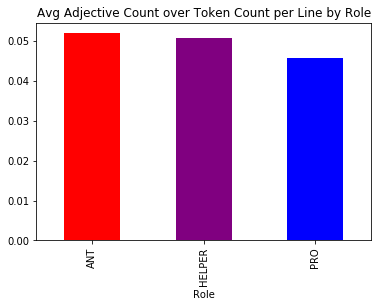

In [33]:
adj_by_role = movie_role_df.groupby('Role')['Adj_over_Tokens'].describe()['mean']
adj_by_role.plot.bar(color = ['red','purple', 'blue'])
plt.title('Avg Adjective Count over Token Count per Line by Role')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\adj_over_tok_role.png")

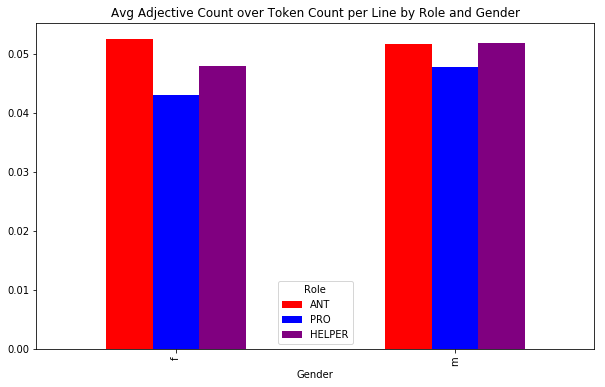

In [34]:
adj_by_role = movie_gen_role_df.groupby(['Gender','Role'], sort=False)["Adj_over_Tokens"].describe()['mean']
adj_by_role.unstack().plot.bar(color = ['red','blue', 'purple'], figsize = (10,6))
plt.title('Avg Adjective Count over Token Count per Line by Role and Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\adj_over_tok_role_gen.png")

When averaged over token count in the line, we see that the difference between female protagonist and antagonist adjective counts decreases, while the difference between male protagonist and antagonist adjective counts increases.

In [35]:
#saving this to a pickle to analyze later...
movie_df.to_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\all_tagged_dialogue.pkl")